In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset/Advertising_Budget_and_Sales-1.csv')
df.head(10)

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [3]:
df = df.drop(["Unnamed: 0"], axis=1)
df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TV Ad Budget ($)         200 non-null    float64
 1   Radio Ad Budget ($)      200 non-null    float64
 2   Newspaper Ad Budget ($)  200 non-null    float64
 3   Sales ($)                200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.columns = ['TV','Radio','Newspaper','Sales']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
print(df.shape)

(200, 4)


In [8]:
categorical = df.select_dtypes(include="object")
categorical.head()

""
0
1
2
3
4


In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


(B). EXPLORATORY DATA ANALYSIS

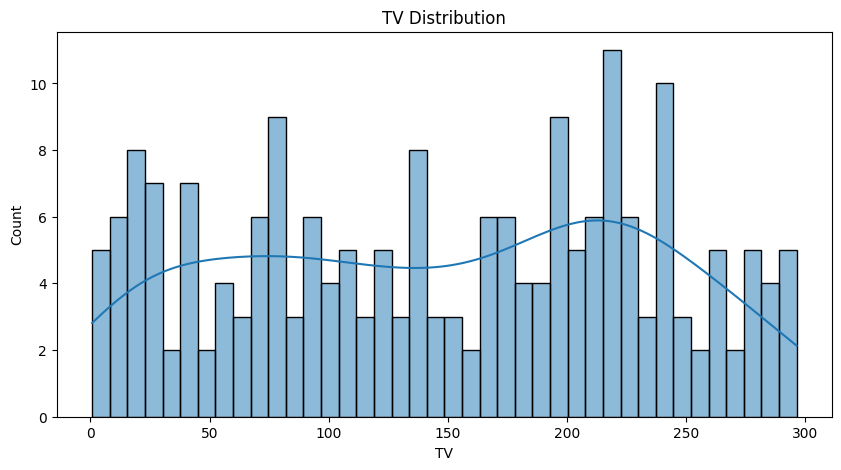

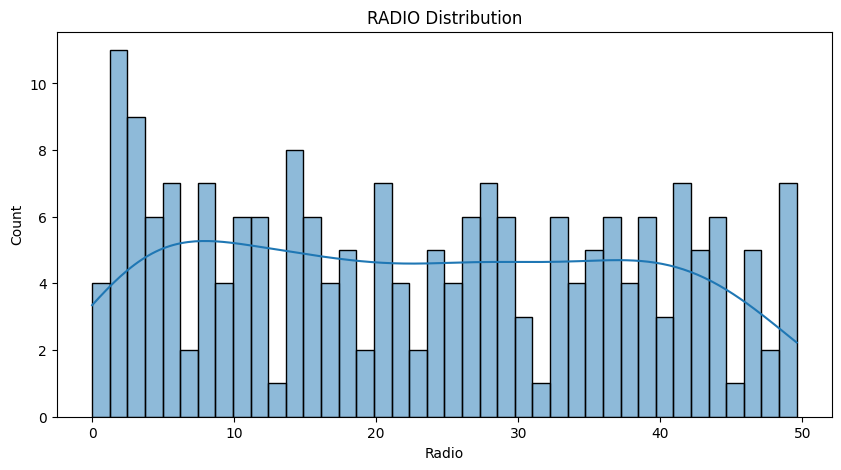

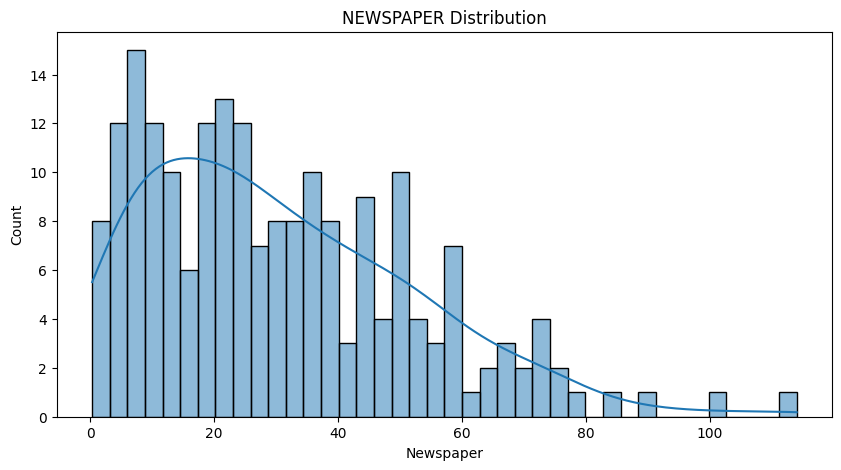

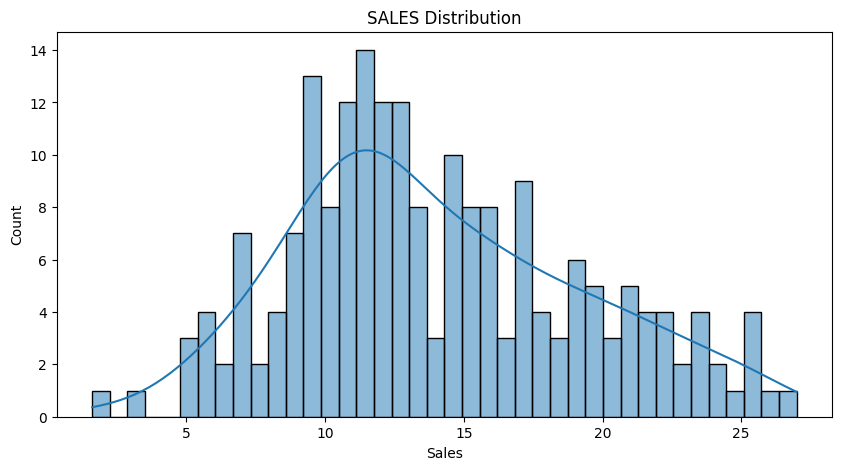

In [11]:
for col in df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df[col], bins=40, kde=True)
    plt.title(f"{col.upper()} Distribution")
    plt.show()

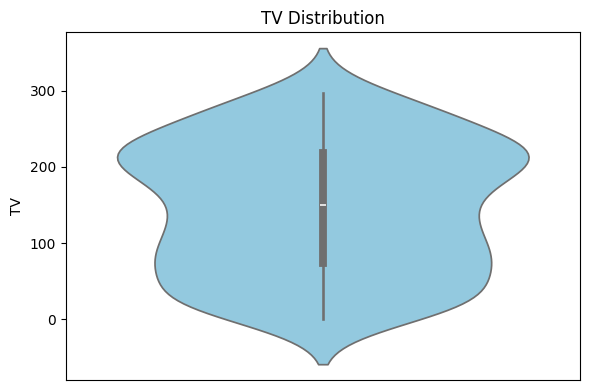

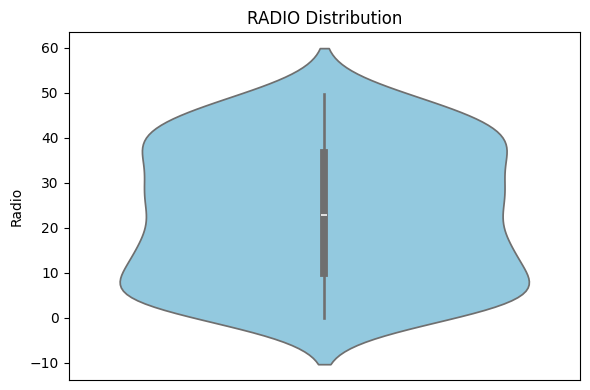

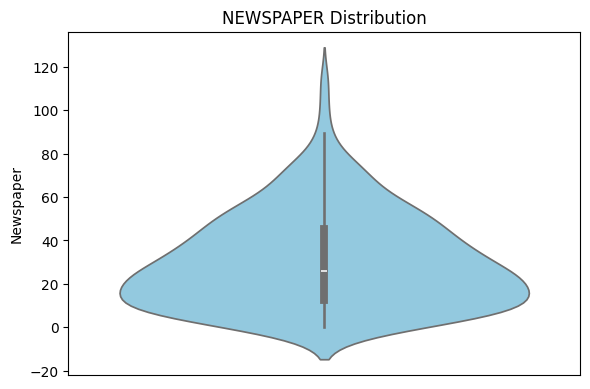

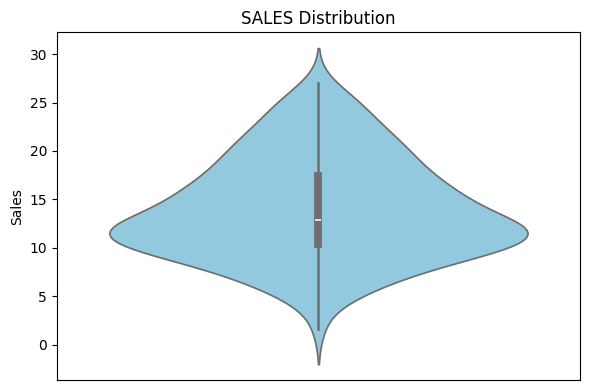

In [12]:
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.violinplot(y=df[col], color="skyblue")
    plt.title(f"{col.upper()} Distribution")
    plt.xticks([])
    plt.tight_layout()
    plt.show()

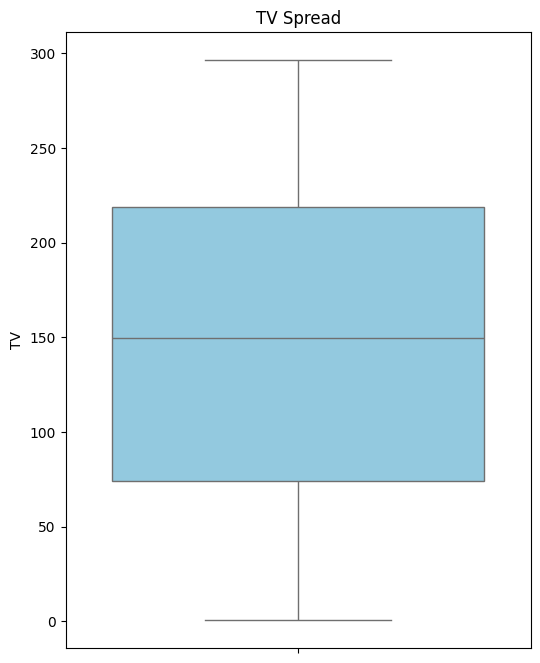

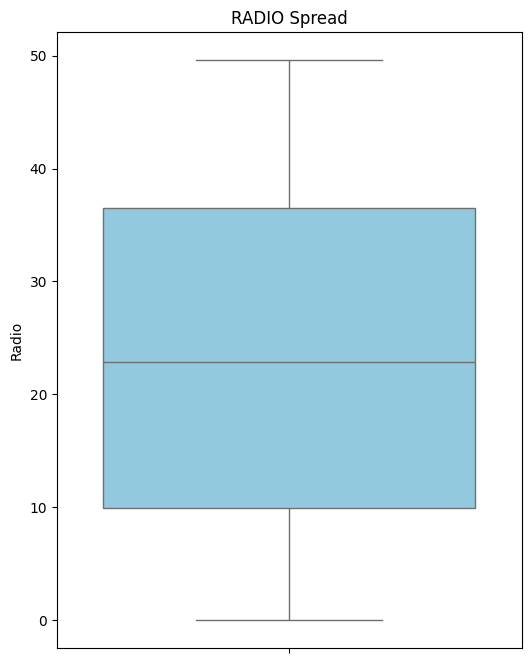

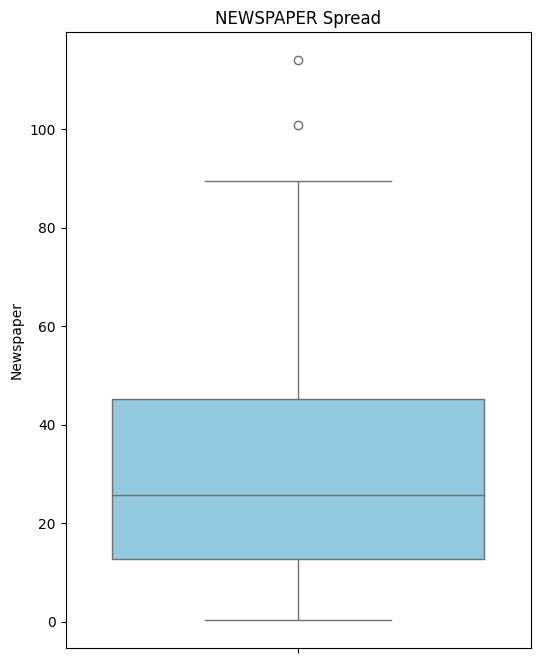

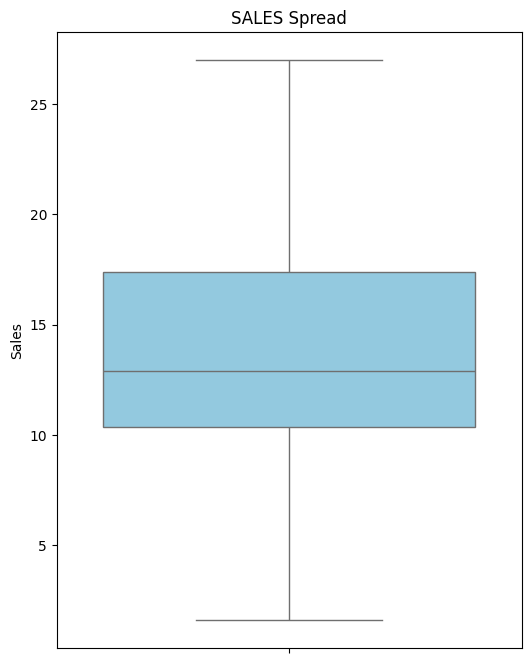

In [13]:
for col in df.columns:
    plt.figure(figsize=(6, 8))
    sns.boxplot(data=df, y=col, color="skyblue")
    plt.title(f"{col.upper()} Spread")
    plt.show()

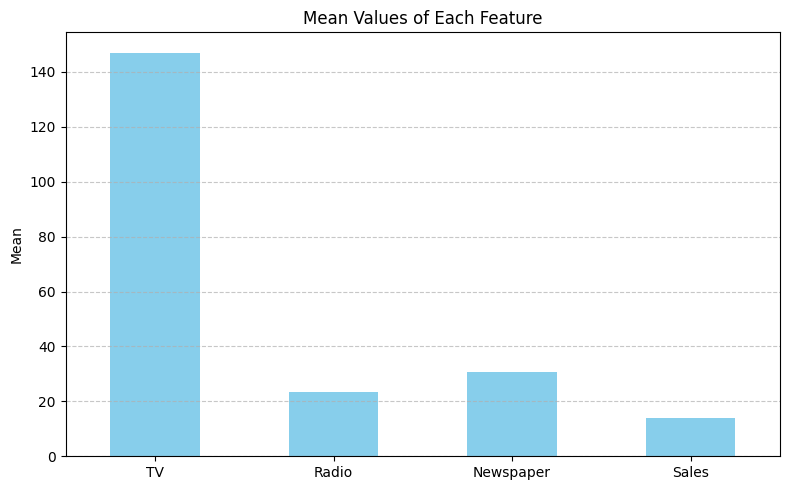

In [14]:
means = df.mean(numeric_only=True)

plt.figure(figsize=(8,5))
means.plot(kind='bar', color='skyblue')
plt.title('Mean Values of Each Feature')
plt.ylabel('Mean')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha = 0.7)
plt.tight_layout()
plt.show()

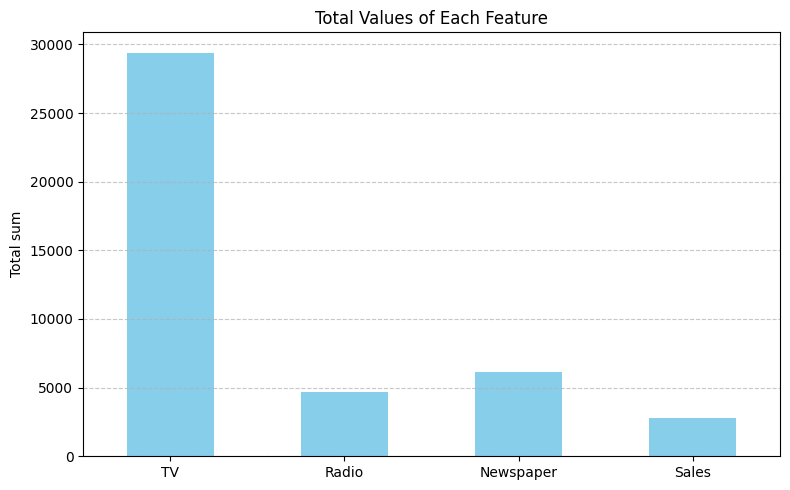

In [15]:
total = df.sum(numeric_only=True)

plt.figure(figsize=(8,5))
total.plot(kind='bar', color='skyblue')
plt.title('Total Values of Each Feature')
plt.ylabel('Total sum')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--' , alpha=0.7)
plt.tight_layout()
plt.show()

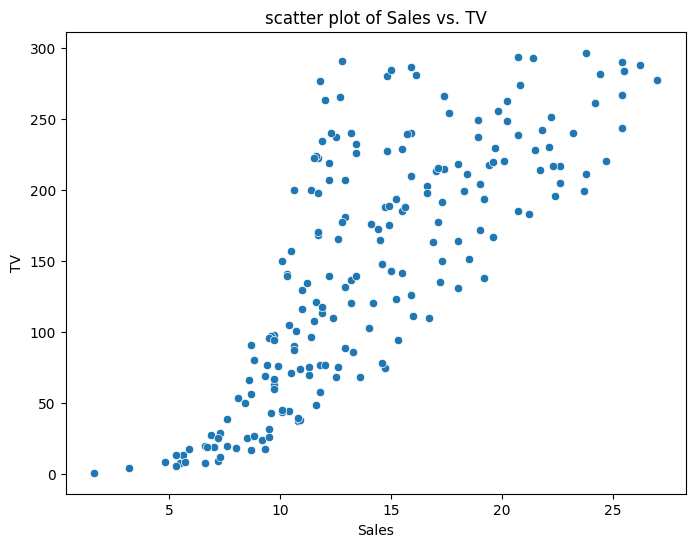

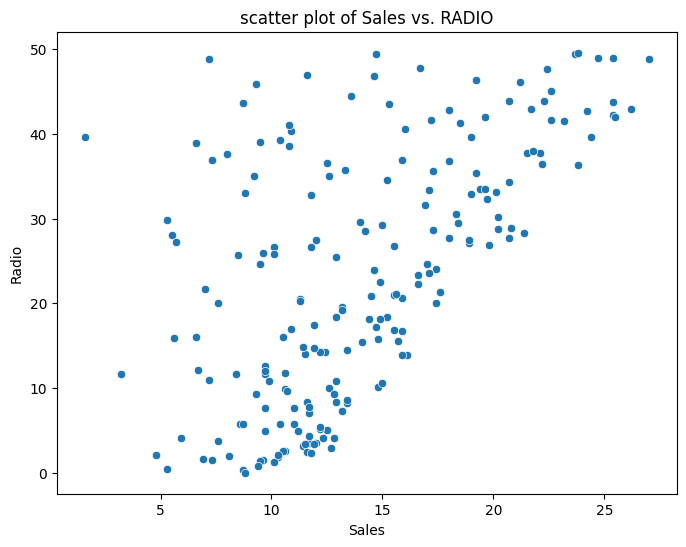

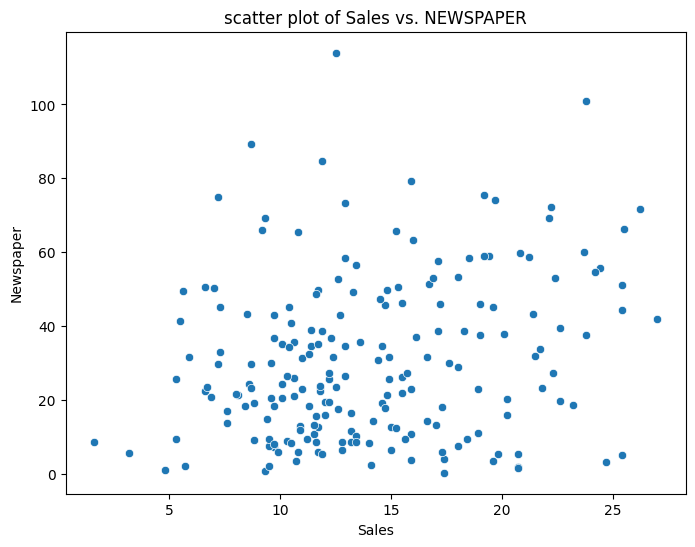

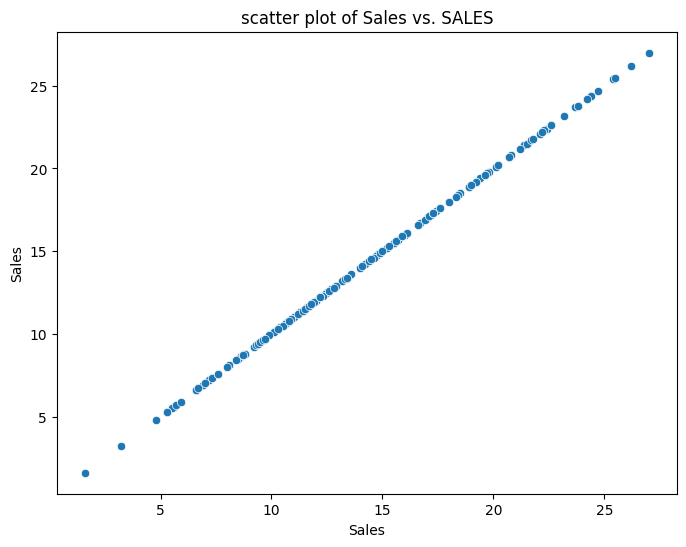

In [16]:
for col in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='Sales', y=col)
    plt.title(f'scatter plot of Sales vs. {col.upper()}')
    plt.show()

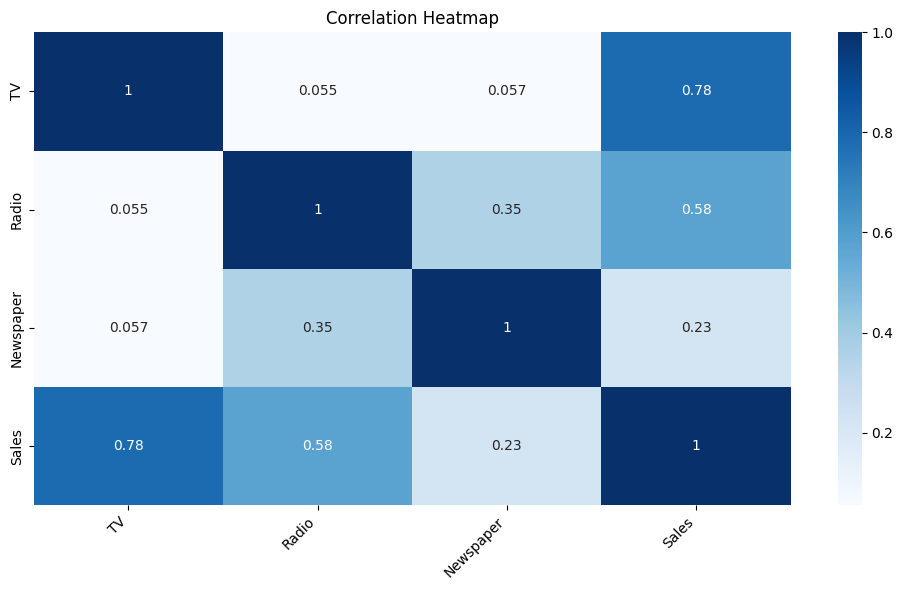

In [17]:
corr_matrix = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

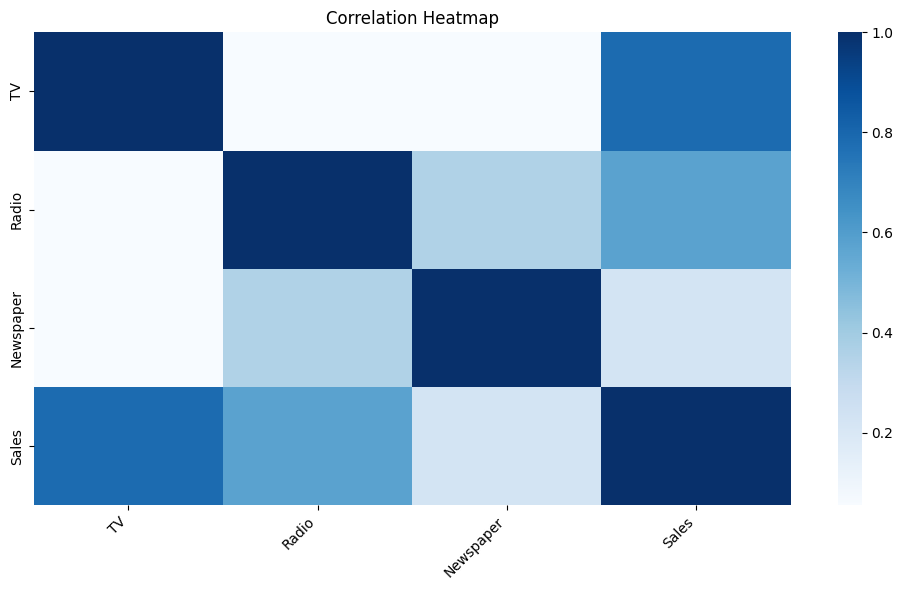

In [18]:
corr_matrix= df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=False, cmap='Blues')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

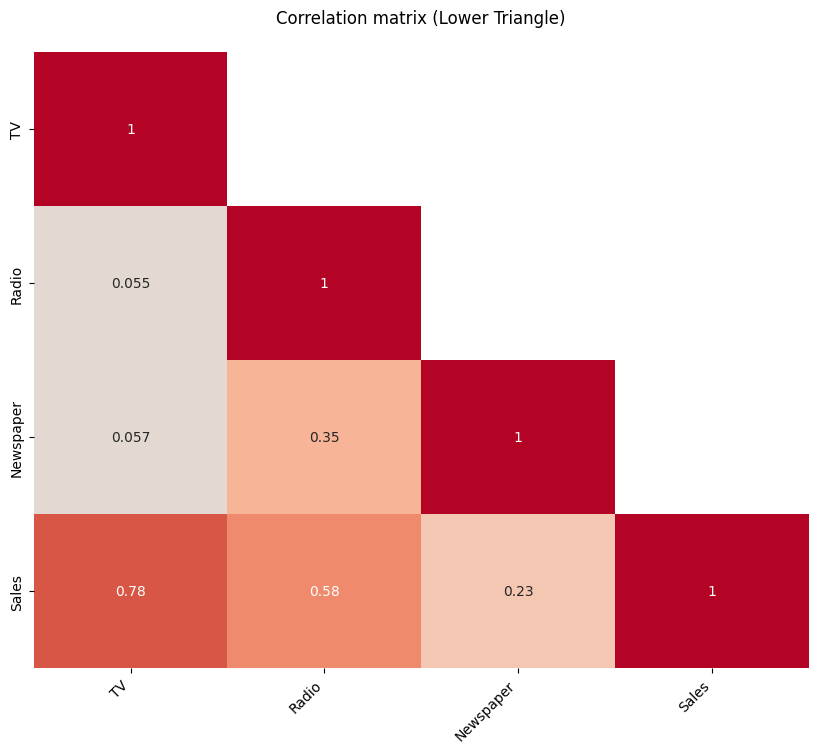

In [19]:
mask= np.triu(np.ones_like(corr_matrix),k=1)
plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    center=0,
    mask=mask,
    cbar=False
    
)
plt.title('Correlation matrix (Lower Triangle)\n')
plt.xticks(rotation=45, ha='right')
plt.show()

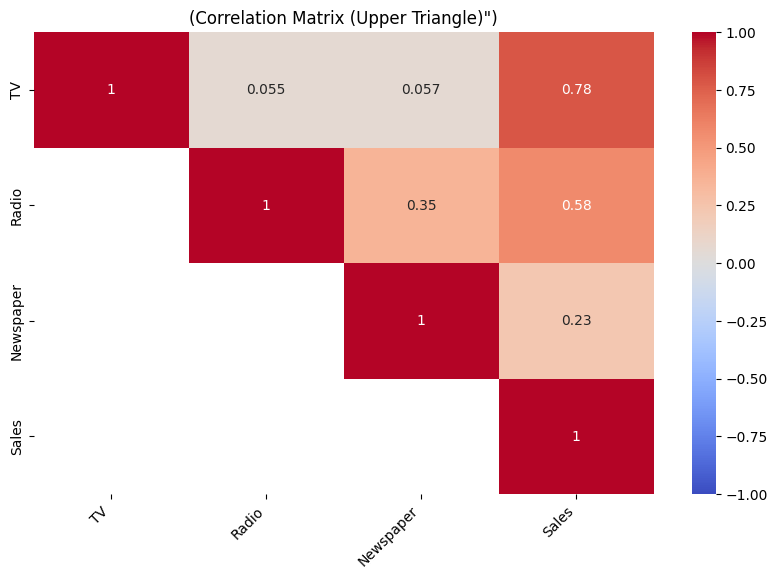

In [20]:
mask = np.tril(np.ones_like(corr_matrix), k=-1)
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    center=0,
    mask=mask,
    cbar=True,
)
plt.title('(Correlation Matrix (Upper Triangle)")')
plt.xticks(rotation=45, ha="right")
plt.show()

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1513: UserWarning: Igno

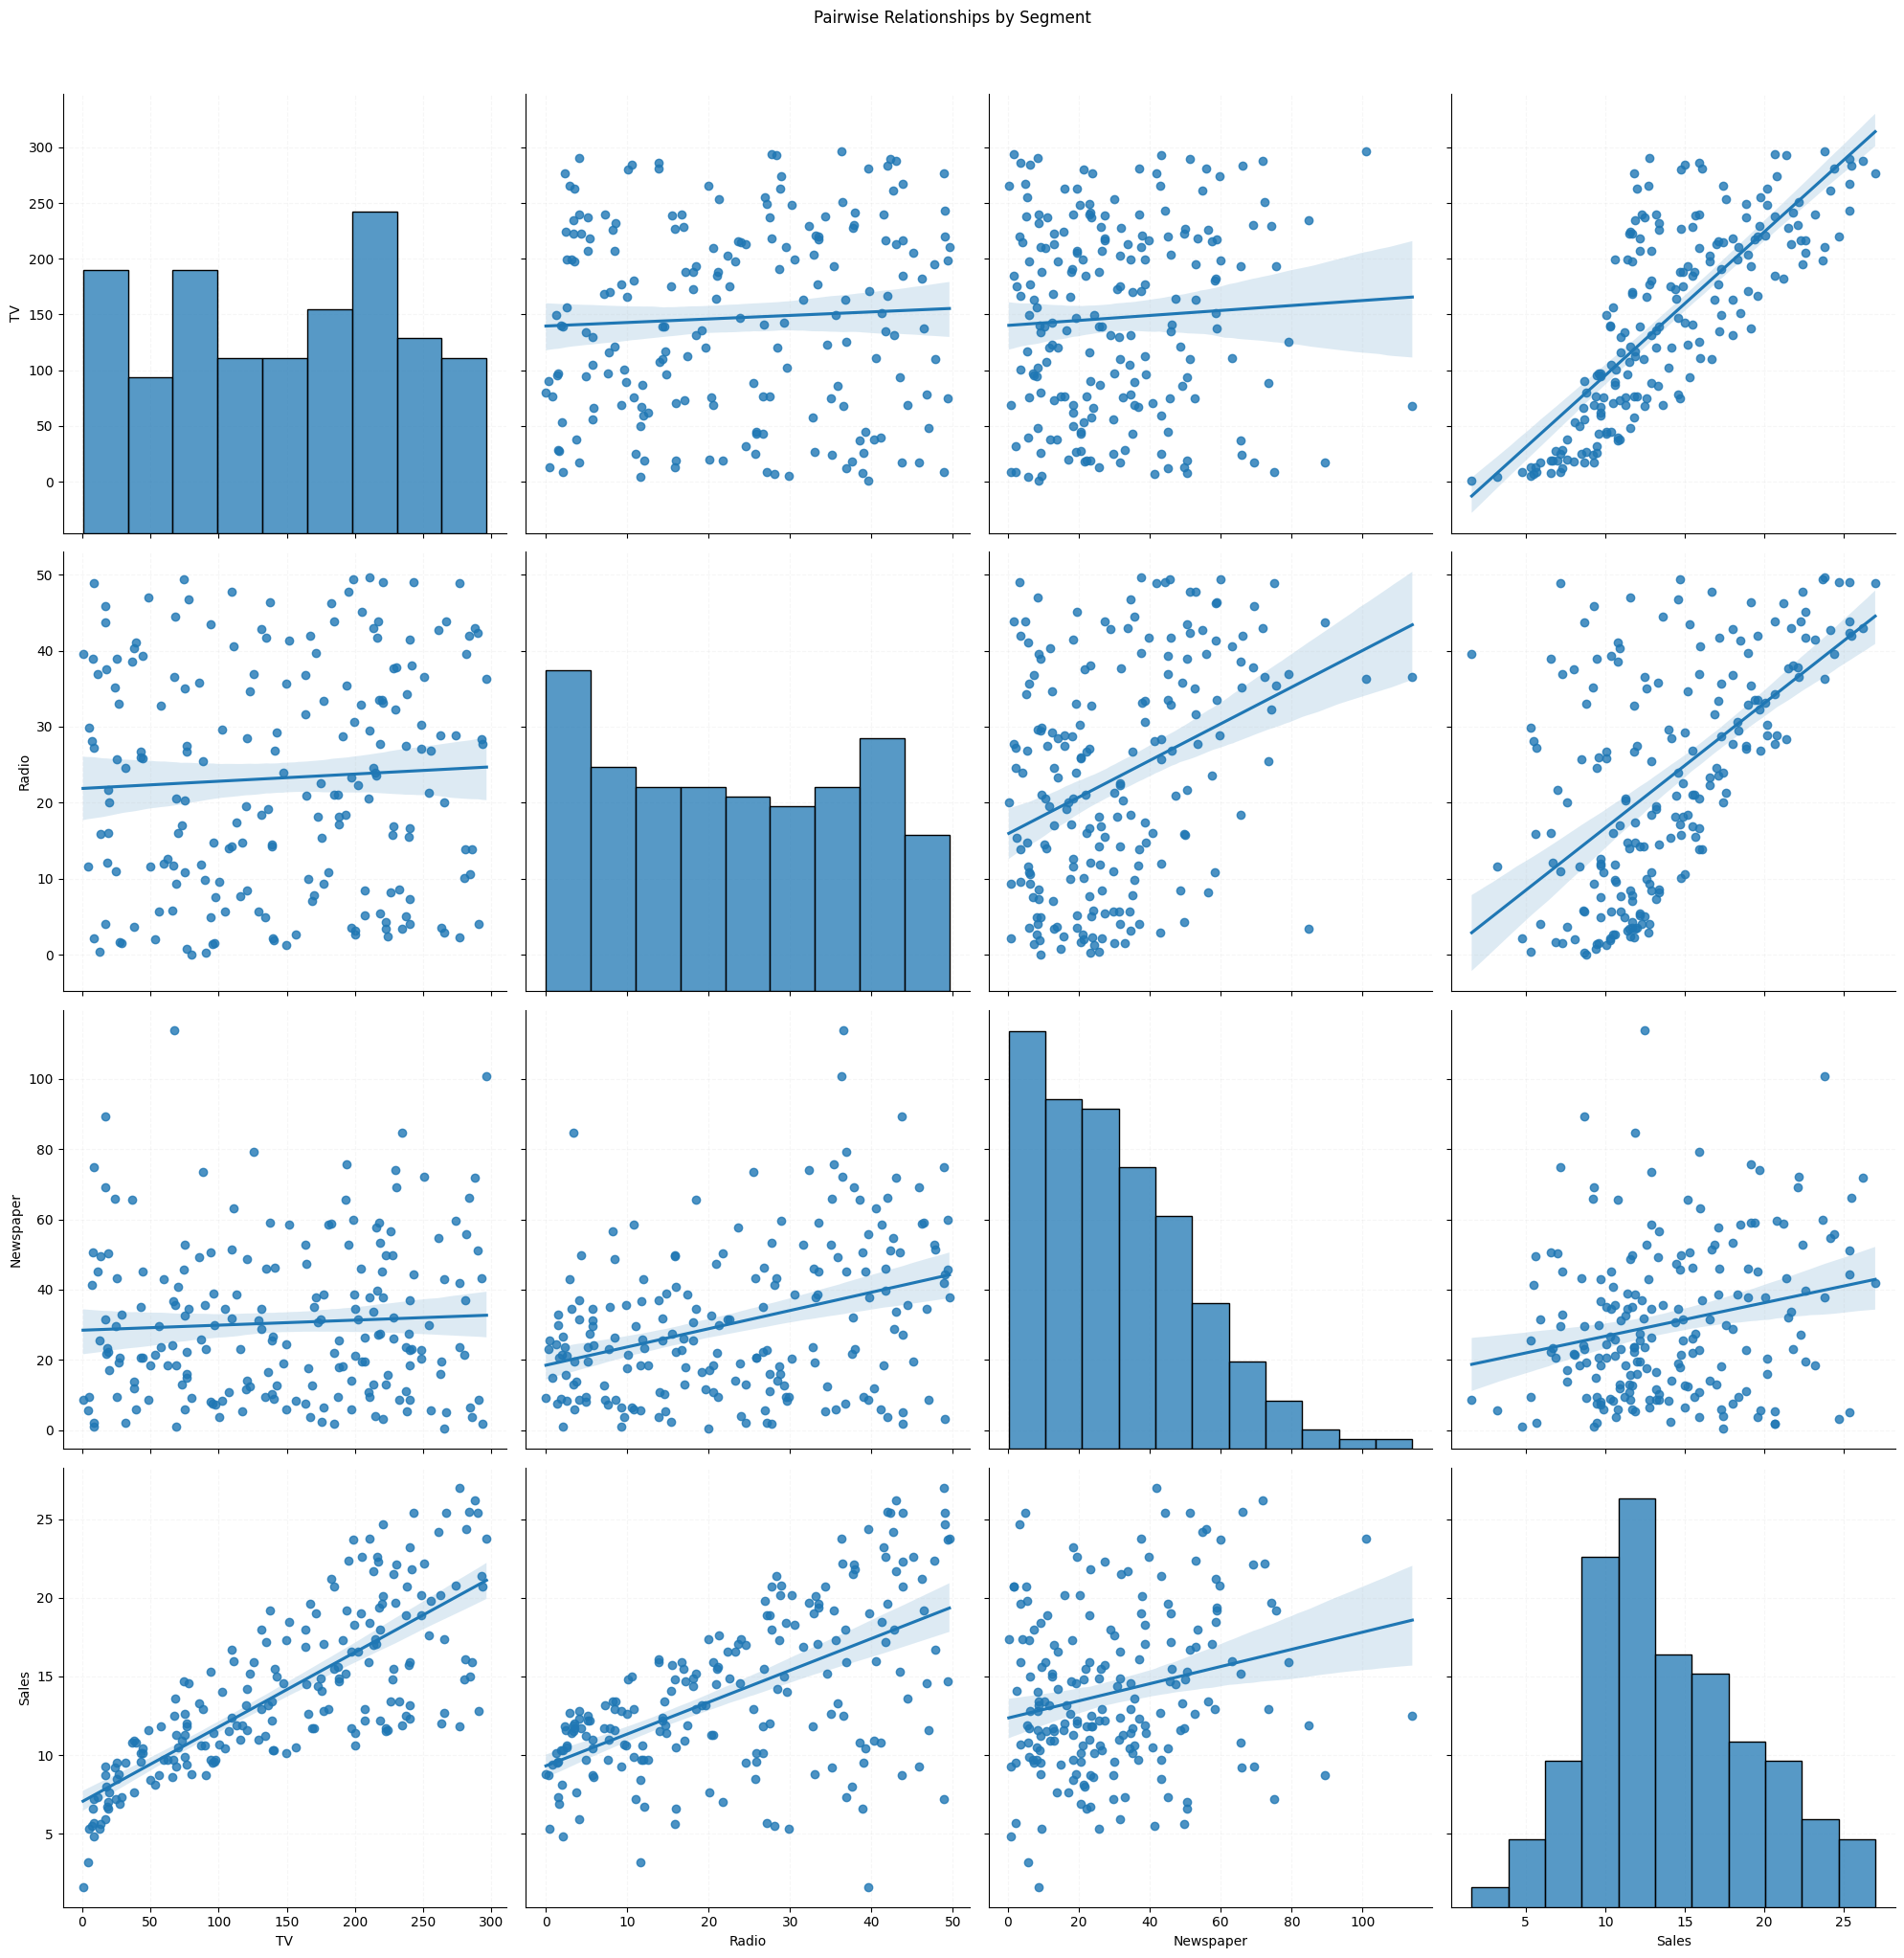

In [21]:
g = sns.pairplot(data=df, 
             diag_kind="auto",
             kind="reg",
             palette='tab10',
             height=5
             )
# add grid to each inner plot
for ax in g.axes.flatten():
    if ax is not None:
        ax.grid(True, linestyle='--', alpha=0.1)
# add title and adjust layout
plt.suptitle('Pairwise Relationships by Segment', y=1.02)
plt.tight_layout()
plt.show()

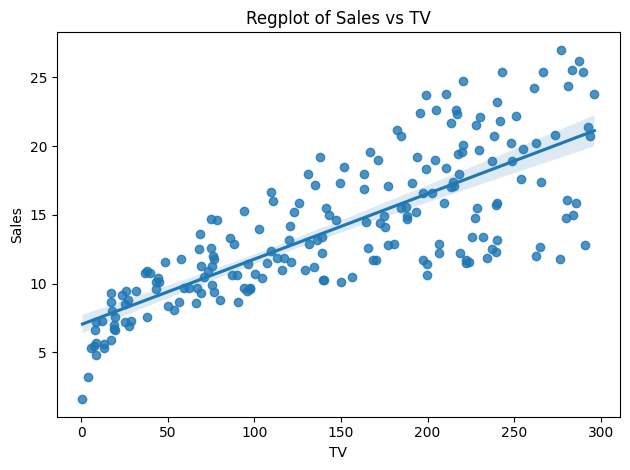

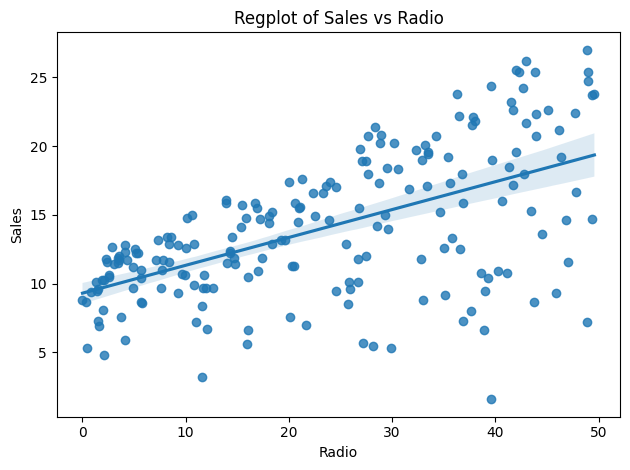

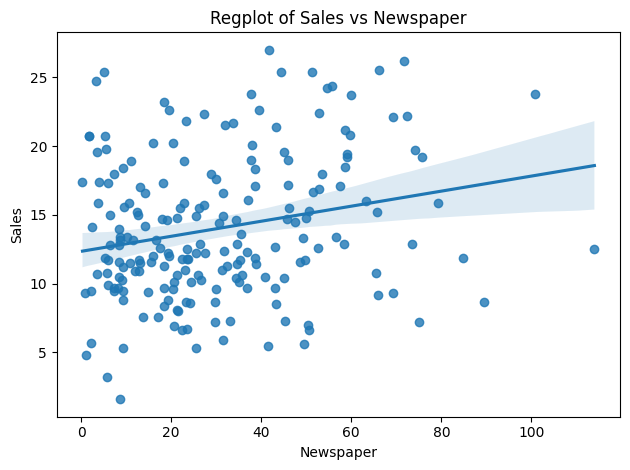

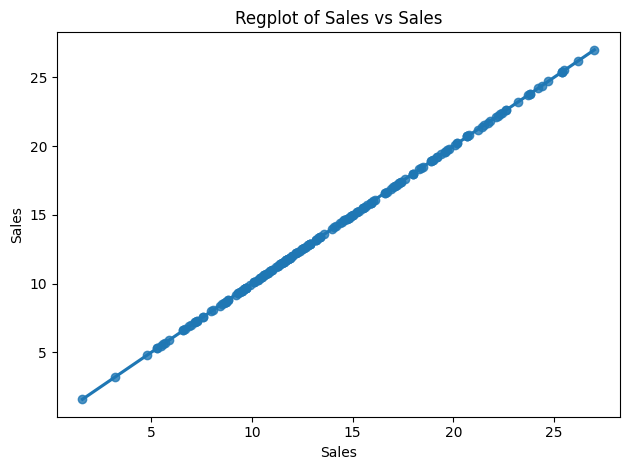

In [22]:
for col in df.columns:
    sns.regplot(data=df, 
                x=col, y="Sales", 
                scatter=True, 
                fit_reg=True, 
                marker="o"
                )
    plt.title(f'Regplot of Sales vs {col}')
    plt.tight_layout()
    plt.show()

## SIDE TRACTION LEARN TO CREATE SINE GRAPH

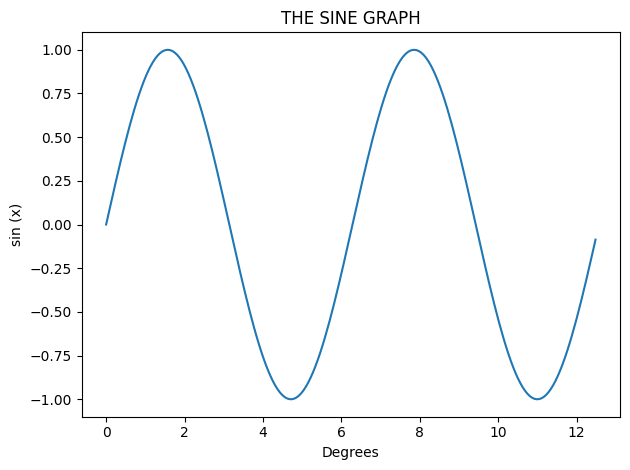

In [23]:
x = np.arange(0.0, 12.5, 0.06)
y = np.sin(x)
plt.plot(x, y)
plt.title("THE SINE GRAPH")
plt.xlabel("Degrees")
plt.ylabel("sin (x)")
plt.tight_layout()
plt.show()

### SIMPLE LINEAR REGRESSION from step 23

In [24]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [25]:
df[['TV']]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [26]:
df['Sales']

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

## Simple Linear Regression

In [27]:
# Separate independent variable (TV) and dependent variable (sales)
x= df[['TV']] # Independent variable (predictor)
y= df[['Sales']] # Dependent variable (target)

In [28]:
print(x.shape, y.shape)

(200, 1) (200, 1)


In [29]:
from sklearn.model_selection import train_test_split as split

x_train, x_test, y_train, y_test = split(x,y, random_state=42)

In [30]:
print(x_train.shape, y_train.shape)

(150, 1) (150, 1)


In [31]:
x_test.shape, y_test.shape

((50, 1), (50, 1))

In [32]:
# Initialize a simple linear regression model
from sklearn.linear_model import LinearRegression
simple = LinearRegression()

In [33]:
# Train the model on the training data
simple.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
# Display the model's coefficient and intercept
print(f'Model Coefficient: {simple.coef_}')
print(f'Model Intercept: {simple.intercept_}')

Model Coefficient: [[0.04689446]]
Model Intercept: [7.13178451]


In [35]:
# make prdictions on the training data
y_train_pred = simple.predict(x_train)
print(f'Predicted training data: {y_train_pred[:10]}')
print(f'\nActual training data: {(y_train[:10].values)}')

Predicted training data: [[10.79893094]
 [15.02881085]
 [ 7.53976627]
 [ 7.49756126]
 [10.71452092]
 [13.19992708]
 [10.57383756]
 [20.71710833]
 [ 8.05091584]
 [16.39812896]]

Actual training data: [[14.6]
 [11.7]
 [ 7.2]
 [ 6.6]
 [ 9.4]
 [11. ]
 [10.9]
 [25.4]
 [ 7.6]
 [11.7]]


In [36]:
# Make predictions on test data
y_pred = simple.predict(x_test)
print(f'Predicted training data: {y_pred[:10]}')
print(f'\nActual training data: {(y_test[:10].values)}')

Predicted training data: [[14.78964913]
 [16.29496116]
 [20.86717059]
 [ 7.68044964]
 [17.4626331 ]
 [10.65355813]
 [17.29850251]
 [ 9.47650729]
 [17.56111146]
 [15.34300371]]

Actual training data: [[16.9]
 [22.4]
 [21.4]
 [ 7.3]
 [24.7]
 [12.6]
 [22.3]
 [ 8.4]
 [11.5]
 [14.9]]


In [37]:
# Import metrics for evaluating model performance
from sklearn.metrics import (r2_score,
                             mean_absolute_error,
                             mean_squared_error,
                             root_mean_squared_error
                             )

In [38]:
# Calculate evaluation metrics for the training data
r2 = r2_score(y_train, y_train_pred)
mae_val = mean_absolute_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_train, y_train_pred)
rmse_val = np.sqrt(mse_val)

In [39]:
# Print evaluation metrics for the training data
print(f'R^2 Score: {r2:.3f}')
print(f'MAE: {mae_val:.3f}')
print(f'MSE: {mse_val:.3f}')
print(f'RMSE: {rmse_val:.3f}')

R^2 Score: 0.591
MAE: 2.648
MSE: 10.961
RMSE: 3.311


<function matplotlib.pyplot.show(close=None, block=None)>

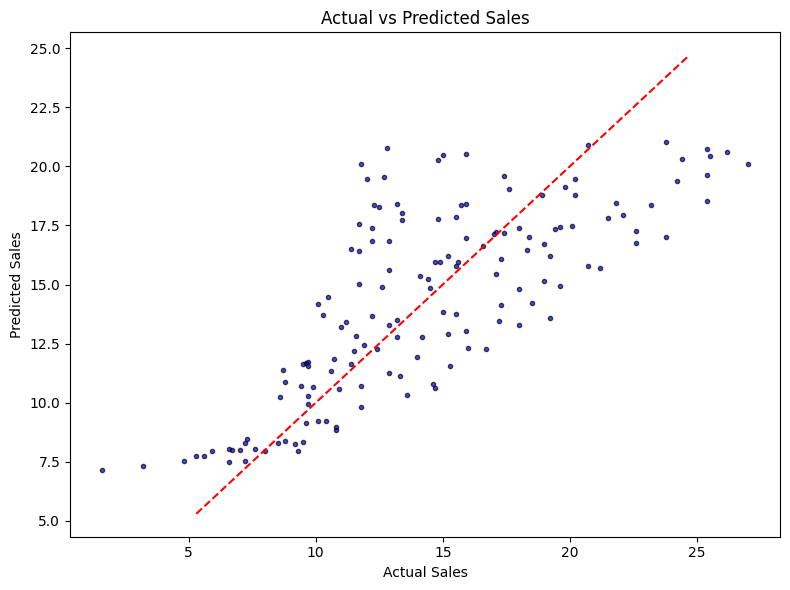

In [40]:
# Plot actual vs. predicted sales for training data
plt.figure(figsize=(8,6))
plt.scatter(y_train,y_train_pred, color='blue', edgecolor='k', alpha=0.7, s=9)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--'
         )
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.tight_layout()
plt.show

## Multiple Linear Regression

In [41]:
# Seperate predictors (all features except sales) and target (sales)
x = df.drop(["Sales"], axis=1)
y = df["Sales"]

In [42]:
# Check the shape of independent and dependent variables
print(x.shape, y.shape)

(200, 3) (200,)


In [43]:
from sklearn.model_selection import train_test_split as split

x_train, x_test, y_train, y_test = split(x,y, random_state=42)

In [44]:
# check the shapes of the training data
print(x_train.shape, y_train.shape)

(150, 3) (150,)


In [45]:
# initialize a multiple linear regression model
from sklearn.linear_model import LinearRegression
multiple = LinearRegression()

In [46]:
# train the model on the training data
multiple.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
# display the model's coefficients and intercept
print(f'Model Coefficient: {multiple.coef_}')
print(f'Model Intercept: {multiple.intercept_}')

Model Coefficient: [0.04543356 0.19145654 0.00256809]
Model Intercept: 2.7783034602452865


In [48]:
# make predictions on the training data
y_train_pred = multiple.predict(x_train)
print(f'Predicted training data: {y_train_pred[:10]}')
print(f'\nActual training data: {y_train[:10].values}')

Predicted training data: [15.37997274 11.8215277  12.72840682 10.71028985  6.44060031  9.82908944
  9.40101614 24.1705031   7.56073512 12.44122425]

Actual training data: [14.6 11.7  7.2  6.6  9.4 11.  10.9 25.4  7.6 11.7]


In [49]:
# make predictions on the test data
y_pred = multiple.predict(x_test)
print(f'Predicted training data: {y_pred[:10]}')
print(f'\nActual training data: {y_test[:10].values}')

Predicted training data: [16.38348211 20.92434957 21.61495426 10.49069997 22.17690456 13.02668085
 21.10309295  7.31813008 13.56732111 15.12238649]

Actual training data: [16.9 22.4 21.4  7.3 24.7 12.6 22.3  8.4 11.5 14.9]


In [50]:
# calculate evaluation metrics for the test data
r2 = r2_score(y_test, y_pred)
mae_val = mean_absolute_error(y_test, y_pred)
mse_val = mean_squared_error(y_test, y_pred)
rmse_val = np.sqrt(mse_val)

In [51]:
#print evaluation metrics for the test data
print(f'R^2 Score: {r2:.3f}')
print(f'MAE: {mae_val:.3f}')
print(f'MSE: {mse_val:.3f}')
print(f'RMSE: {rmse_val:.3f}')

R^2 Score: 0.894
MAE: 1.402
MSE: 2.880
RMSE: 1.697


### Model Explainability

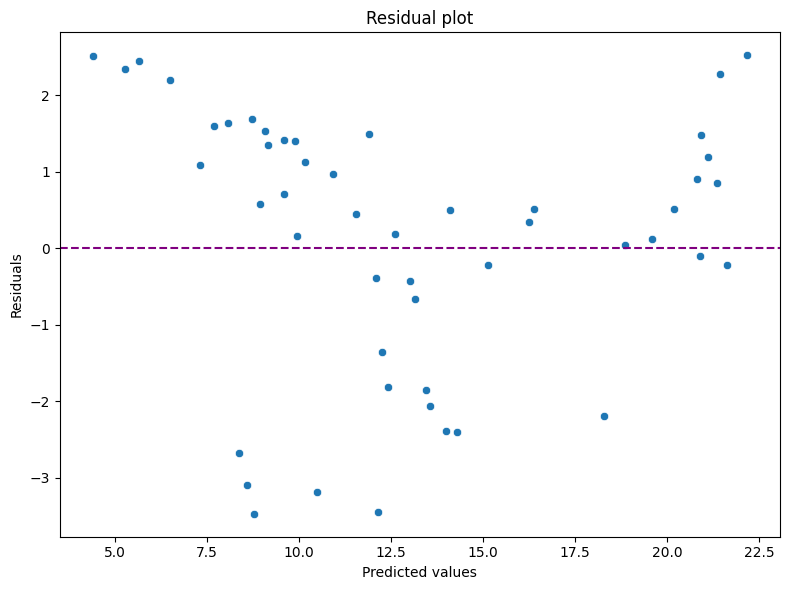

In [52]:
# calculate residuals and create a scatter plot to access model fit
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, linestyle='--', color='purple')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_19136\292592333.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True, color='purple')


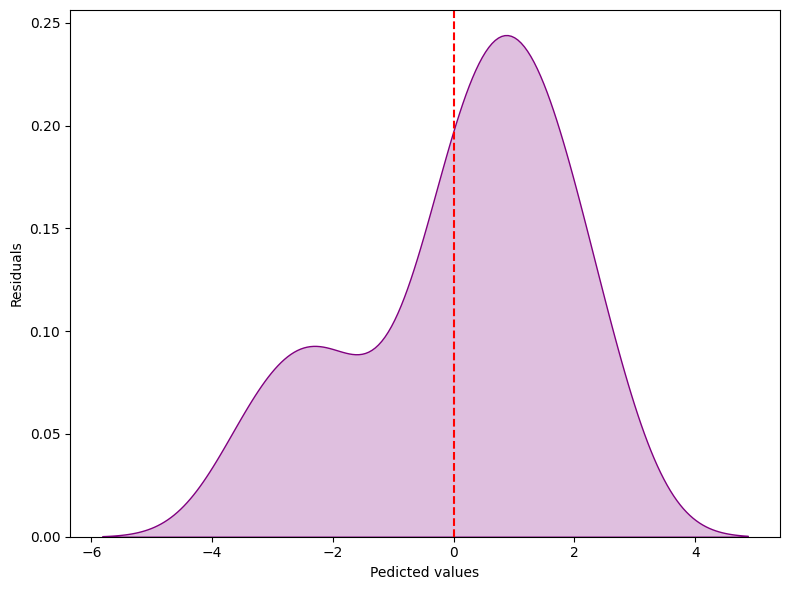

In [53]:
# plot the kernel density estimation (KDE) OF RESIDUALS
plt.figure(figsize=(8,6))
sns.kdeplot(residuals, shade=True, color='purple')
plt.axvline(0, linestyle='--', color='red')
plt.xlabel('Pedicted values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

In [54]:
#import SHAP library for model explainabilty
import shap

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [56]:
# Create SHAP Explainer for the multiple linear regression model
explainer = shap.Explainer(multiple, x_train)

In [57]:
# Compute SHAP values for the test data 
shap_values = explainer(x_test)

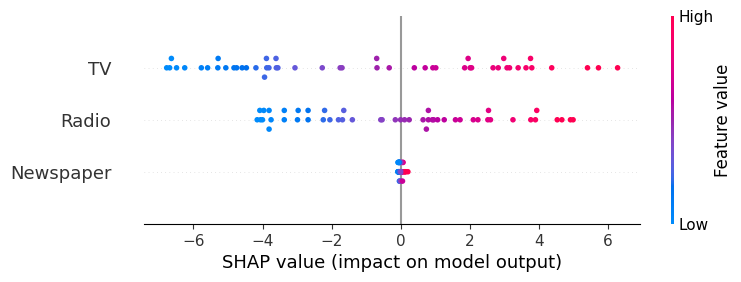

In [58]:
# Generate a beeswarm plot to visualize the distribution of SHAP values 
shap.plots.beeswarm(shap_values)

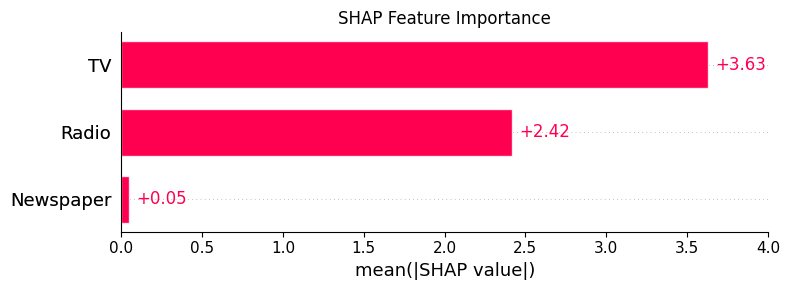

In [59]:
# Create a bar plot to show global feature importance based on average absolute SHAP values 
shap.plots.bar(shap_values, show=False)
plt.title("SHAP Feature Importance")
plt.tight_layout()
plt.show()

In [60]:
import joblib

In [61]:
#save the multiple regression model
joblib.dump(multiple, 'multiple_regression_model.pkl')

['multiple_regression_model.pkl']

In [62]:
#save simple regression model
joblib.dump(simple, 'simple_regression_model.pkl')

['simple_regression_model.pkl']